In [1]:
import pandas as pd
import scipy
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Abrindo arquivos
csv20171 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2017_1.csv", sep = ";", usecols = [8, 16, 41])
csv20172 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2017_2.csv", sep = ";", usecols = [8, 16, 41])
csv20181 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2018_1.csv", sep = ";", usecols = [7, 15, 40])
csv20182 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2018_2.csv", sep = ";", usecols = [7, 15, 40])
csv20191 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2019_1.csv", sep = ";", usecols = [7, 15, 40])
csv20192 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2019_2.csv", sep = ";", usecols = [7, 15, 40])
csv20201 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2020_1.csv", sep = ";", usecols = [7, 15, 40])
csv20202 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2020_2.csv", sep = ";", usecols = [7, 15, 40])
csv20211 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2021_1.csv", sep = ";", usecols = [7, 15, 40])
csv20212 = pd.read_csv("/home/andre/Documentos/Testes_Estatisticos/M2021_2.csv", sep = ";", usecols = [7, 15, 40])


In [3]:
# Concatenando documentos de 2020 a 2021 em um so
df_2018to2021 = pd.concat([csv20171, csv20172, csv20181, csv20182, csv20191, csv20192, csv20201, csv20202, csv20211, csv20212], ignore_index=True)
display(df_2018to2021)

,IDADE,CODMUNRES,LINHAA
0,420,120039,*R58X
1,202,120040,*P285
2,483,120040,*A419
3,415,120040,*G80X
4,450,120070,*I64X
...,...,...,...
7368561,465,170310,*J81X
7368562,470,170210,*R570
7368563,454,171880,*R99X
7368564,459,171070,*R570


In [4]:
# Filtrando linhas por tipo de cancer
csv_cancerpulmao = df_2018to2021.loc[df_2018to2021['LINHAA'] ==  "*C341"] # C34.1 refere-se ao câncer de pulmão no CID 10
csv_cancercolon = df_2018to2021.loc[df_2018to2021['LINHAA'] ==  "*C180"]  # C18 refere-se ao câncer de cólon no CID 10
csv_cancerpele = df_2018to2021.loc[df_2018to2021['LINHAA'] ==  "*C430"]   # C43 refere-se ao câncer de pele no CID 10
csv_cancermama = df_2018to2021.loc[df_2018to2021['LINHAA'] ==  "*C500"]   # C43 refere-se ao câncer de pele no CID 10
csv_cancerestomago = df_2018to2021.loc[df_2018to2021['LINHAA'] ==  "*C160"]   # C43 refere-se ao câncer de pele no CID 10

# Puxando coluna de idades
idades_cancerpulmao = csv_cancerpulmao['IDADE']
idades_cancercolon = csv_cancercolon['IDADE']
idades_cancerpele = csv_cancerpele['IDADE']
idades_cancermama = csv_cancermama['IDADE']
idades_cancerestomago = csv_cancerestomago['IDADE']
print(idades_cancermama)

# Puxando coluna de municipios
municipios_cancerpulmao = csv_cancerpulmao['CODMUNRES']
municipios_cancercolon = csv_cancercolon['CODMUNRES']
municipios_cancerpele = csv_cancerpele['CODMUNRES']
municipios_cancermama = csv_cancermama['CODMUNRES']
municipios_cancerestomago = csv_cancerestomago['CODMUNRES']

# Testando se as idades filtradas estão em anos
for i in idades_cancerpulmao:
    if i < 400 or i > 499:
        print(f'item {i}, não esta de acordo com a saída esperada')
        break

for i in idades_cancercolon:
    if i < 400 or i > 499:
        print(f'item {i}, não esta de acordo com a saída esperada')
        break

for i in idades_cancerpele:
    if i < 400 or i > 499:
        print(f'item {i}, não esta de acordo com a saída esperada')
        break

for i in idades_cancermama:
    if i < 400 or i > 499:
        print(f'item {i}, cancer mama não esta de acordo com a saída esperada')
        break

for i in idades_cancerestomago:
    if i < 400 or i > 499:
        print(f'item {i}, cancer estomago não esta de acordo com a saída esperada')
        break


45795      461
68134      456
104585     441
137582     477
145527     492
          ... 
7087614    486
7096351    463
7174167    483
7281411    489
7306172    478
Name: IDADE, Length: 219, dtype: int64


In [5]:
dic_Mun = { 12 : "ACRE" , 27 : "ALAGOAS", 16 : "AMAPÁ", 13 : "AMAZONAS", 29 : "BAHIA",
			23 : "CEARÁ", 53 : "DF", 32 : "ESPÍRITO SANTO", 52 : "GOIÁS",
			21 : "MARANHÃO", 51 : "MATO GROSSO", 50 : "MATO GROSSO DO SUL", 
			31 : "MINAS GERAIS" , 15 : "PARÁ" , 25 : "PARAÍBA" , 41 : "PARANÁ" , 26 : "PERNAMBUCO",
			22 : "PIAUÍ" , 33 : "RIO DE JANEIRO" , 24 : "RIO GRANDE DO NORTE" , 43 : "RIO GRANDE DO SUL" , 
			11 : "RONDONIA" , 14 : "RORAIMA" , 42 : "SANTA CATARINA" , 35 : "SÃO PAULO" ,
			28 : "SERGIPE" , 17 : "TOCANTINS"}

print(dic_Mun[12])


ACRE


In [6]:
municipios_cancerpulmao_ = [int(mun/10000) for mun in municipios_cancerpulmao]
municipios_cancercolon_ = [int(mun/10000) for mun in municipios_cancercolon]
municipios_cancerpele_ = [int(mun/10000) for mun in municipios_cancerpele]
municipios_cancermama_ = [int(mun/10000) for mun in municipios_cancermama]
municipios_cancerestomago_ = [int(mun/10000) for mun in municipios_cancerestomago]
print(municipios_cancermama_)


[29, 29, 29, 23, 23, 23, 32, 32, 21, 31, 31, 25, 25, 26, 26, 26, 26, 26, 26, 41, 41, 33, 33, 24, 43, 43, 43, 43, 42, 35, 35, 35, 35, 35, 35, 35, 13, 13, 13, 13, 13, 13, 29, 29, 29, 29, 29, 29, 23, 23, 23, 23, 23, 23, 23, 21, 31, 31, 31, 31, 31, 31, 15, 25, 26, 41, 41, 33, 24, 43, 43, 43, 42, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 31, 43, 23, 33, 13, 35, 26, 15, 24, 25, 26, 33, 35, 23, 27, 42, 35, 35, 43, 42, 43, 35, 35, 43, 31, 26, 35, 26, 23, 23, 43, 35, 35, 13, 13, 43, 43, 35, 33, 29, 29, 35, 31, 29, 23, 43, 13, 13, 13, 13, 29, 29, 29, 29, 29, 29, 29, 23, 23, 32, 52, 21, 31, 31, 31, 31, 25, 25, 26, 41, 33, 33, 33, 33, 33, 33, 24, 24, 43, 43, 43, 43, 43, 42, 42, 42, 35, 35, 35, 35, 35, 35, 13, 13, 13, 29, 29, 29, 29, 23, 21, 21, 31, 31, 31, 31, 15, 25, 41, 33, 33, 33, 24, 11, 43, 43, 43, 42, 42, 42, 35, 35, 35, 35, 35, 35, 35, 35, 35]


In [31]:
municipio = municipios_cancerestomago_
moda = scipy.stats.mode(municipio)
print(moda[0])
print(dic_Mun[moda[0]])
dic = {}
for i in municipio:
    if i in dic:
        dic[i] = dic[i] + 1
    else:
        dic[i] = 1
print(dic)

top_3 = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:3]
print(top_3)
dic_Mun[33]

35
SÃO PAULO
{12: 1, 27: 3, 13: 8, 29: 19, 23: 27, 21: 5, 31: 30, 15: 11, 26: 20, 41: 27, 33: 30, 24: 1, 43: 29, 42: 9, 35: 52, 17: 1, 53: 1, 32: 9, 50: 2, 25: 4, 22: 2, 16: 1, 51: 5, 52: 2, 28: 2, 14: 1}
[(35, 52), (31, 30), (33, 30)]


'RIO DE JANEIRO'

In [33]:
idades_cancerpulmao = [idade - 400 for idade in idades_cancerpulmao]
idades_cancercolon = [idade - 400 for idade in idades_cancercolon]
idades_cancerpele = [idade - 400 for idade in idades_cancerpele]
idades_cancermama = [idade - 400 for idade in idades_cancermama]
idades_cancerestomago = [idade - 400 for idade in idades_cancerestomago]

print(f'Idades 1: {idades_cancerpulmao}')
print(f'Idades 2: {idades_cancercolon}')
print(f'Idades 3: {idades_cancerpele}')
print(f'Idades 4: {idades_cancermama}')
print(f'Idades 5: {idades_cancerestomago}')
print(len(idades_cancerpele))

Idades 1: [-335, -331, -346, -332, -319, -335, -328, -332, -313, -323, -325, -338, -337, -333, -326, -321, -312, -333, -341, -334, -321, -316, -345, -333, -356, -343, -312, -313, -342, -336, -348, -315, -355, -319, -324, -318, -333, -334, -322, -305, -383, -328, -337, -332, -333, -326, -339, -315, -335, -325, -338, -329, -322, -344, -352, -326, -335, -326, -315, -324, -339, -320, -342, -327, -349, -346, -336, -338, -357, -335, -349, -327, -322, -317, -348, -335, -321, -329, -327, -326, -319, -327, -329, -339, -344, -347, -318, -315, -339, -318, -311, -316, -342, -332, -335, -324, -338, -326, -334, -342, -333, -342, -314, -320, -344, -338, -335, -329, -320, -325, -349, -321, -341, -324, -346, -337, -342, -322, -319, -336, -335, -334, -335, -333, -352, -315, -330, -327, -331, -344, -319, -325, -349, -330, -341, -336, -323, -325, -322, -334, -334, -336, -323, -332, -335, -332, -335, -336, -317, -347, -330, -354, -337, -336, -320, -322, -318, -339, -344, -326, -322, -334, -332, -318, -325,

In [32]:
# Valor do alpha
alpha = 0.05

# Teste Shapiro Wilk para o Cancer de Mama
stat_pele, p_pele= scipy.stats.shapiro(idades_cancermama)
print(f'Estatística do teste cancer de mama: {stat_pele}')
print(f'Valor-p cancer de pele: {p_pele}')

if p_pele > alpha:
    print("Distribuição aparentemente normal (falha ao rejeitar H0)\n")
else:
    print("Distribuição não é normal (rejeita-se H0)\n")

# Teste Shapiro Wilk para o Cancer de Pulmao
stat_pulmao, p_pulmao= scipy.stats.shapiro(idades_cancerpulmao)
print(f'Estatística do teste cancer de pulmao: {stat_pulmao}')
print(f'Valor-p cancer de pulmao: {p_pulmao}')

if p_pulmao > alpha:
    print("Distribuição aparentemente normal (falha ao rejeitar H0)\n")
else:
    print("Distribuição não é normal (rejeita-se H0)\n")

# Teste Shapiro Wilk para o Cancer de Colon
stat_colon, p_colon= scipy.stats.shapiro(idades_cancercolon)
print(f'Estatística do teste cancer de colon: {stat_colon}')
print(f'Valor-p cancer de colon: {p_colon}')

if p_colon > alpha:
    print("Distribuição aparentemente normal (falha ao rejeitar H0)\n")
else:
    print("Distribuição não é normal (rejeita-se H0)\n")

# Teste Shapiro Wilk para o Cancer de Pele
stat_pele, p_pele= scipy.stats.shapiro(idades_cancerpele)
print(f'Estatística do teste cancer de pele: {stat_pele}')
print(f'Valor-p cancer de pele: {p_pele}')

if p_pele > alpha:
    print("Distribuição aparentemente normal (falha ao rejeitar H0)\n")
else:
    print("Distribuição não é normal (rejeita-se H0)\n")

# Teste Shapiro Wilk para o Cancer de Estômago
stat_pele, p_pele= scipy.stats.shapiro(idades_cancerestomago)
print(f'Estatística do teste cancer de estomago: {stat_pele}')
print(f'Valor-p cancer de pele: {p_pele}')

if p_pele > alpha:
    print("Distribuição aparentemente normal (falha ao rejeitar H0)\n")
else:
    print("Distribuição não é normal (rejeita-se H0)\n")

Estatística do teste cancer de mama: 0.9824147432061333
Valor-p cancer de pele: 0.007925140410423373
Distribuição não é normal (rejeita-se H0)

Estatística do teste cancer de pulmao: 0.9868609587432359
Valor-p cancer de pulmao: 0.0005546665868728186
Distribuição não é normal (rejeita-se H0)

Estatística do teste cancer de colon: 0.9872547098714912
Valor-p cancer de colon: 0.0024253275159319258
Distribuição não é normal (rejeita-se H0)

Estatística do teste cancer de pele: 0.9228165659880279
Valor-p cancer de pele: 0.18721811233343644
Distribuição aparentemente normal (falha ao rejeitar H0)

Estatística do teste cancer de estomago: 0.98216186437248
Valor-p cancer de pele: 0.0008197855311624741
Distribuição não é normal (rejeita-se H0)



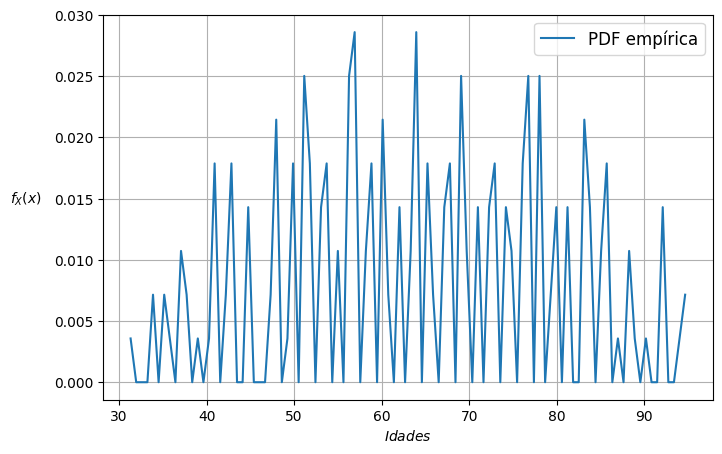

In [10]:
# Exemplo de vetores para comparação estatística
h1, c1 = np.histogram(idades_cancermama, bins = 100)
epdf1 = (h1 / len(idades_cancerpulmao)) / (c1[1] - c1[0])
fig = plt.figure()
ax = fig.add_subplot(111)
xrange = np.max(c1) - np.min(c1)
yrange = np.max(epdf1) - np.min(epdf1)
ax.set_aspect(5.0 * xrange / yrange / 8.0)
plt.tight_layout()
plt.plot((c1[1 :] + c1[: len(c1) - 1]) / 2.0, epdf1, label = 'PDF empírica', linewidth = 1.5)
x = np.linspace(-2, 5, 10000)
plt.xlabel('${Idades}$')
plt.ylabel('${f_X(x)}$', rotation = 0.0, labelpad = 20)
plt.grid()
plt.legend(fontsize=12.0)
plt.show()

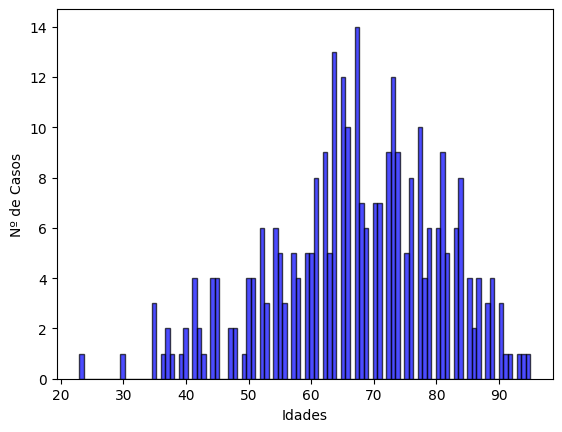

In [18]:
plt.hist(idades_cancerestomago, bins=100, alpha=0.7, color='blue', edgecolor='black')
# plt.title('Histograma das idades dos falecidos por Câncer de Pulmões')
plt.xlabel('Idades')
plt.ylabel('Nº de Casos')
plt.show()

In [16]:
# Supondo que 'idades1' seja uma lista ou array de dados
idades1 = np.array(idades_cancerestomago)

# Parâmetros estatísticos
moda = scipy.stats.mode(idades1)
media = np.mean(idades1)  # Média
mediana = np.median(idades1)  # Mediana
desvio_padrao = np.std(idades1)  # Desvio padrão (populacional)
variancia = np.var(idades1)  # Variância (populacional)
minimo = np.min(idades1)  # Valor mínimo
maximo = np.max(idades1)  # Valor máximo
percentis = np.percentile(idades1, [25, 50, 75])  # Quartis (percentis 25%, 50%, 75%)
amplitude = np.ptp(idades1)  # Amplitude (diferença entre max e min)

# Exibir os resultados
print(f"Moda: {moda[0]}")
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")
print(f"Variância: {variancia}")
print(f"Valor mínimo: {minimo}")
print(f"Valor máximo: {maximo}")
print(f"Percentis (25%, 50%, 75%): {percentis}")
print(f"Amplitude: {amplitude}")


Moda: 67
Média: 67.03973509933775
Mediana: 67.0
Desvio Padrão: 13.525242916721227
Variância: 182.93219595631774
Valor mínimo: 23
Valor máximo: 95
Percentis (25%, 50%, 75%): [59. 67. 77.]
Amplitude: 72


In [13]:
import statsmodels.api as sm
from scipy.stats import f_oneway
from statsmodels.formula.api import ols

In [14]:
# Concatenando os dados em uma lista
valores = idades_cancerpulmao + idades_cancercolon

# Criando uma lista para identificar os grupos
grupos = ['A'] * len(idades_cancerpulmao) + ['B'] * len(idades_cancerpulmao)

# Criando o DataFrame
dados = pd.DataFrame({'grupo': grupos, 'valor': valores})

# Ajustar o modelo ANOVA
modelo = ols('valor ~ grupo', data=dados).fit()

# Realizar a análise de variância
anova_resultado = sm.stats.anova_lm(modelo, typ=2)

# Exibir o resultado
print("Resultado com StatsModel", anova_resultado)
print()
print("Resultado do PR(>F)", anova_resultado.loc['grupo', 'PR(>F)'] )
#resultado legivel

if anova_resultado.loc['grupo', 'PR(>F)'] < 0.05:
    print("Há evidências de que há diferença significativa entre os grupos. TESTE PANDAS")
else:
    print("Não há evidências de diferença significativa entre os grupos. TESTE PANDAS")

ValueError: All arrays must be of the same length